# Plots from workflow logs

This notebook demonstrates the use of `pandas` to analyse logs from the `wflogger` LOTUS workflow logging tool.

In [24]:
import sys
sys.path.insert(0, "..")

import wflogger.analysis as wfa

# Reloading is required when developing the: wflogger.analysis library (but not in standard use)
import importlib
import wflogger.analysis
wfa = importlib.reload(wflogger.analysis)

## Decide which workflow and tags you want to look at

I want to compare two runs:



In [25]:
sel_1 = {
    "workflow": "my-model-1",
    "tag": "idl-version"
}

sel_2 = {
    "workflow": "my-model-1",
    "tag": "python-version"
}

In [26]:
df1 = wfa.get_results(workflow=sel_1["workflow"], tag=sel_1["tag"])
df2 = wfa.get_results(workflow=sel_2["workflow"], tag=sel_2["tag"])

Converted 800 records.
Converted 1200 records.


In [30]:
df2.head()

,id,user_id,hostname,workflow,tag,stage_number,stage,iteration,date_time,comment,flag,duration
0,4964,astephen,host574.jc.rl.ac.uk,my-model-1,python-version,1,start,1,2022-03-22 13:24:54.625175,,-999,0.0
1,4965,astephen,host574.jc.rl.ac.uk,my-model-1,python-version,2,read,1,2022-03-22 13:25:05.725175,,-999,11.1
2,4966,astephen,host574.jc.rl.ac.uk,my-model-1,python-version,3,process,1,2022-03-22 13:25:17.725175,,-999,12.0
3,4967,astephen,host574.jc.rl.ac.uk,my-model-1,python-version,4,summarise,1,2022-03-22 13:25:21.225175,,-999,3.5
4,4968,astephen,host336.jc.rl.ac.uk,my-model-1,python-version,1,start,2,2022-03-22 13:25:21.925175,,-999,0.0


In [35]:
wfa = importlib.reload(wflogger.analysis)

## Let's view the different tags in separate plots

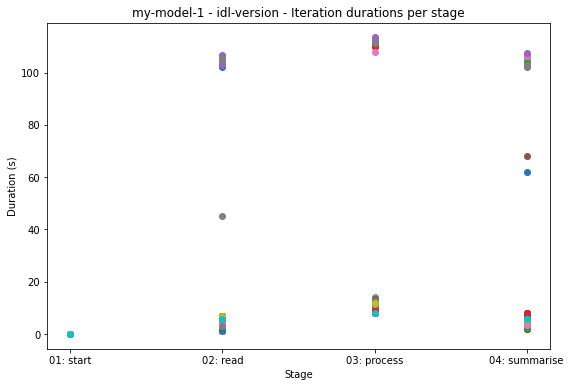

In [36]:
wfa.plot_stage_durations_by_iteration(df1)

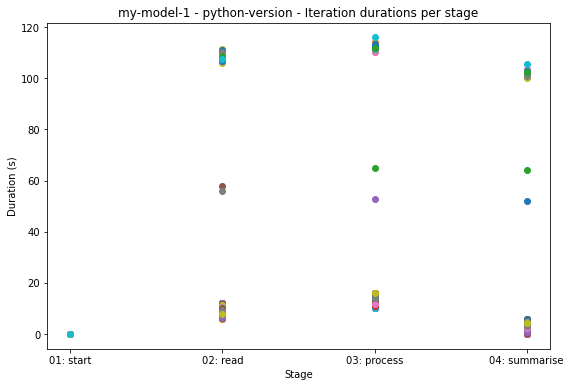

In [37]:
wfa.plot_stage_durations_by_iteration(df2)

### Let's compare the maximum durations of each stage for each tag

In order to view the differences better, we are plotting a log scale on the y-axis:

113.4


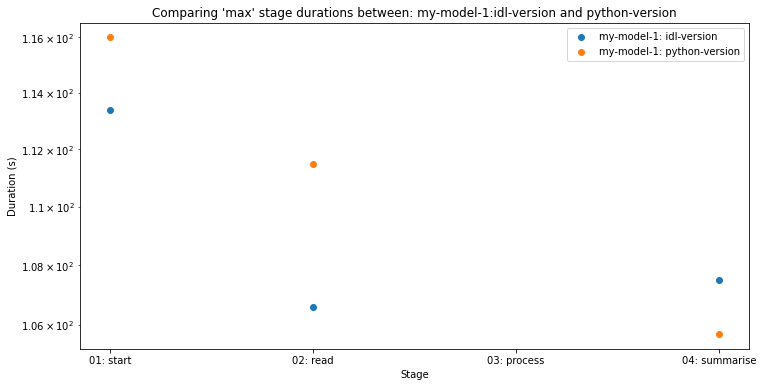

In [7]:
wfa.plot_comparison_of_two_workflow_tags(df1, df2, "max", yscale="log")

### Let's look for outliers

We can identify outliers as those beyond N standard deviations from the mean.

In [8]:
import numpy as np

def get_outliers(df, n_std_deviations=3):
    return df[np.abs(df.duration - df.duration.mean()) <= (n_std_deviations * df.duration.std())]

df1_outliers = get_outliers(df1)

In [9]:
df1_outliers.head()
print(df1_outliers.iloc[3].duration)
print(df1_outliers.duration.mean())

62.0
5.157532467532467


Which hosts are the outliers on?

In [10]:
print(sorted(df1_outliers.hostname.unique()))

['host072.jc.rl.ac.uk', 'host073.jc.rl.ac.uk', 'host076.jc.rl.ac.uk', 'host078.jc.rl.ac.uk', 'host082.jc.rl.ac.uk', 'host086.jc.rl.ac.uk', 'host089.jc.rl.ac.uk', 'host094.jc.rl.ac.uk', 'host095.jc.rl.ac.uk', 'host106.jc.rl.ac.uk', 'host116.jc.rl.ac.uk', 'host117.jc.rl.ac.uk', 'host119.jc.rl.ac.uk', 'host120.jc.rl.ac.uk', 'host123.jc.rl.ac.uk', 'host126.jc.rl.ac.uk', 'host128.jc.rl.ac.uk', 'host134.jc.rl.ac.uk', 'host135.jc.rl.ac.uk', 'host139.jc.rl.ac.uk', 'host147.jc.rl.ac.uk', 'host148.jc.rl.ac.uk', 'host149.jc.rl.ac.uk', 'host153.jc.rl.ac.uk', 'host154.jc.rl.ac.uk', 'host157.jc.rl.ac.uk', 'host159.jc.rl.ac.uk', 'host161.jc.rl.ac.uk', 'host162.jc.rl.ac.uk', 'host166.jc.rl.ac.uk', 'host172.jc.rl.ac.uk', 'host175.jc.rl.ac.uk', 'host189.jc.rl.ac.uk', 'host191.jc.rl.ac.uk', 'host204.jc.rl.ac.uk', 'host207.jc.rl.ac.uk', 'host215.jc.rl.ac.uk', 'host221.jc.rl.ac.uk', 'host231.jc.rl.ac.uk', 'host243.jc.rl.ac.uk', 'host247.jc.rl.ac.uk', 'host250.jc.rl.ac.uk', 'host254.jc.rl.ac.uk', 'host256.j

In [11]:
df1_outliers["hostname"].value_counts().sort_values(ascending=False)

host503.jc.rl.ac.uk    16
host311.jc.rl.ac.uk    12
host149.jc.rl.ac.uk    12
host526.jc.rl.ac.uk     8
host256.jc.rl.ac.uk     8
                       ..
host106.jc.rl.ac.uk     1
host117.jc.rl.ac.uk     1
host119.jc.rl.ac.uk     1
host126.jc.rl.ac.uk     1
host123.jc.rl.ac.uk     1
Name: hostname, Length: 168, dtype: int64

In [12]:
df1_outliers.loc[:, ["hostname", "duration"]].sort_values("duration", ascending=False)

,hostname,duration
543,host166.jc.rl.ac.uk,68.0
3,host095.jc.rl.ac.uk,62.0
549,host618.jc.rl.ac.uk,45.0
438,host421.jc.rl.ac.uk,14.0
342,host442.jc.rl.ac.uk,13.8
...,...,...
236,host668.jc.rl.ac.uk,0.0
588,host576.jc.rl.ac.uk,0.0
232,host162.jc.rl.ac.uk,0.0
592,host538.jc.rl.ac.uk,0.0


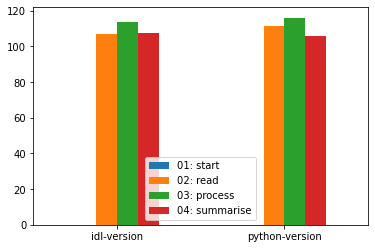

In [13]:
wfa.plot_bar_chart_comparing_tags(df1, df2)

## Next thoughts

Some things we can do with hostname:
 1. Look at outliers and whether certain hosts are the problem
 2. Add host groups to the dataframes:
   - by architecture?
   - by numbered groups: e.g. `host100-199`, `host200-299`, etc.
 3. Then compare the durations by different groups.

In [38]:
# some testing...
def add_hostset_column(df):
    df["hostset"] = df["hostname"].str[4] + "00"
    
add_hostset_column(df1)

In [39]:
df1.head()

,id,user_id,hostname,workflow,tag,stage_number,stage,iteration,date_time,comment,flag,duration,hostset
0,4164,astephen,host095.jc.rl.ac.uk,my-model-1,idl-version,1,start,1,2022-03-22 11:02:19.205175,,-999,0.0,000
1,4165,astephen,host095.jc.rl.ac.uk,my-model-1,idl-version,2,read,1,2022-03-22 11:02:21.105175,,-999,1.9,000
2,4166,astephen,host095.jc.rl.ac.uk,my-model-1,idl-version,3,process,1,2022-03-22 11:02:31.105175,,-999,10.0,000
3,4167,astephen,host095.jc.rl.ac.uk,my-model-1,idl-version,4,summarise,1,2022-03-22 11:03:33.105175,,-999,62.0,000
4,4168,astephen,host134.jc.rl.ac.uk,my-model-1,idl-version,1,start,2,2022-03-22 11:03:33.605175,,-999,0.0,100


In [17]:
def add_hostgroup_column(df):
    return 

/tmp/ipykernel_513/3437850104.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  boxplot = df1.groupby("hostset")[("duration", "stage")].boxplot(column=["duration"]) #column=['Col1', 'Col2', 'Col3'])


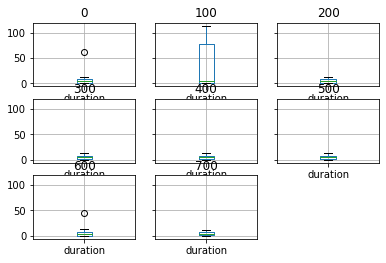

In [19]:
boxplot = df1.groupby("hostset")[("duration", "stage")].boxplot(column=["duration"]) #column=['Col1', 'Col2', 'Col3'])

In [20]:
# Or, better in a single plot
df1_stats = df1.loc[:, ["stage_number", "stage", "hostset", "duration"]].sort_values("stage_number") #.drop("stage_number")

def get_stage_name(row):
    return f"{row.stage_number:02d}:{row.stage}"

df1_stats["stage_name"] = df1_stats.apply(get_stage_name, axis=1)

01:start             AxesSubplot(0.1,0.15;0.173913x0.75)
02:read         AxesSubplot(0.308696,0.15;0.173913x0.75)
03:process      AxesSubplot(0.517391,0.15;0.173913x0.75)
04:summarise    AxesSubplot(0.726087,0.15;0.173913x0.75)
dtype: object

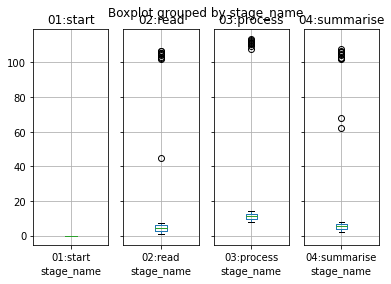

In [21]:
df1_stats.head()
df1_stats.groupby(["stage_name"]).boxplot(column=["duration"], by="stage_name", layout=(1, 4))

01:start             AxesSubplot(0.1,0.15;0.173913x0.75)
02:read         AxesSubplot(0.308696,0.15;0.173913x0.75)
03:process      AxesSubplot(0.517391,0.15;0.173913x0.75)
04:summarise    AxesSubplot(0.726087,0.15;0.173913x0.75)
dtype: object

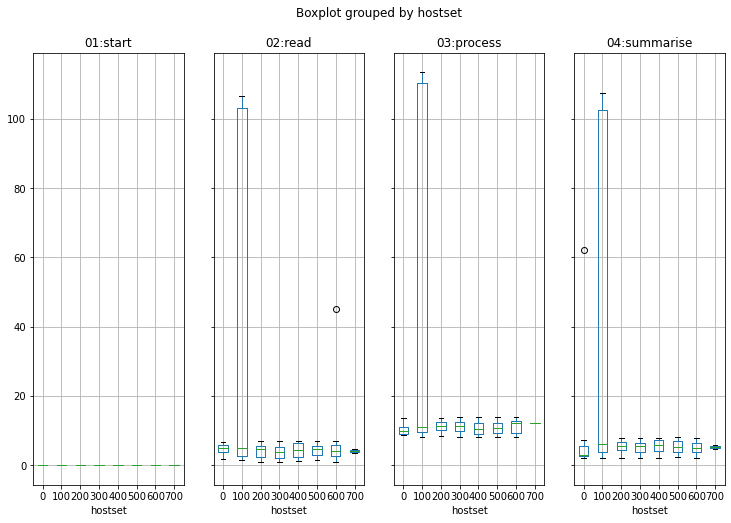

In [22]:
df1_stats.groupby(["stage_name"]).boxplot(column=["duration"], by="hostset", layout=(1, 4), figsize=(12, 8))

## Wow, the hostset 100-199 seems to have higher values!